# Problem statement

# Imports libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing, metrics, cross_validation
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
import plotly
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import squarify # for tree maps
import matplotlib.pyplot as plt
%matplotlib inline


C:\Users\panch\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
init_notebook_mode(connected=True)

# Reading train and test data

In [3]:
train_data=pd.read_csv("Train-1542969243754.csv",na_values=["?",","])
print(train_data.shape)
print(train_data.info())


(14417, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14417 entries, 0 to 14416
Data columns (total 2 columns):
ClaimID      14417 non-null object
ClaimSize    14417 non-null object
dtypes: object(2)
memory usage: 225.3+ KB
None


In [4]:
test_data=pd.read_csv("Test-1542969243754.csv",na_values=["?",","])
print(test_data.shape)
print(test_data.info())

(4806, 1)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4806 entries, 0 to 4805
Data columns (total 1 columns):
ClaimID    4806 non-null object
dtypes: object(1)
memory usage: 37.6+ KB
None


In [5]:
train_claim_det=pd.read_csv("Train_ClaimDetails-1542969243754.csv",na_values=["?",","])
print(train_claim_det.shape)
print(train_claim_det.info())


(14417, 55)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14417 entries, 0 to 14416
Data columns (total 55 columns):
ClaimID                                             14417 non-null object
Injury_Date                                         14417 non-null object
Date_reported                                       14417 non-null object
Age_Injured                                         14417 non-null int64
Work_related_injury_status                          9367 non-null object
Amputation                                          151 non-null object
Death                                               1710 non-null object
Burns_heat                                          197 non-null object
Burns_chemical                                      67 non-null object
SystemicPoisoning_toxic                             51 non-null object
SystemicPoisoning_other                             28 non-null object
Eye_injury_blindness                                130 non-null object
Respirato

In [6]:
test_claim_det=pd.read_csv("Test_ClaimDetails-1542969243754.csv",na_values=["?",","])
print(test_claim_det.shape)
print(test_claim_det.info())

(4806, 55)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4806 entries, 0 to 4805
Data columns (total 55 columns):
ClaimID                                             4806 non-null object
Injury_Date                                         4806 non-null object
Date_reported                                       4806 non-null object
Age_Injured                                         4806 non-null int64
Work_related_injury_status                          3099 non-null object
Amputation                                          46 non-null object
Death                                               592 non-null object
Burns_heat                                          58 non-null object
Burns_chemical                                      27 non-null object
SystemicPoisoning_toxic                             15 non-null object
SystemicPoisoning_other                             4 non-null object
Eye_injury_blindness                                39 non-null object
RespiratoryCondition 

In [7]:
train_policy_demo=pd.read_csv("Train_Policy_Demographics-1542969243754.csv",na_values=["?",","])
print(train_policy_demo.shape)
print(train_policy_demo.info())

(14417, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14417 entries, 0 to 14416
Data columns (total 10 columns):
PolicyID                     14417 non-null object
PolicyType                   14417 non-null int64
PolicyForm                   14417 non-null int64
Employment_status            14417 non-null object
BusinessClass                14417 non-null int64
Perperson_Policylimit        14417 non-null int64
PerOccurrence_PolicyLimit    14417 non-null int64
CombinedSingleLimit          14417 non-null int64
ClaimID                      14417 non-null object
PolicyLimitPerInjury         14417 non-null int64
dtypes: int64(7), object(3)
memory usage: 1.1+ MB
None


In [8]:
test_policy_demo=pd.read_csv("Test_Policy_Demographics-1542969243754.csv",na_values=["?",","])
print(test_policy_demo.shape)
print(test_policy_demo.info())

(4806, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4806 entries, 0 to 4805
Data columns (total 10 columns):
PolicyID                     4806 non-null object
PolicyType                   4806 non-null int64
PolicyForm                   4806 non-null int64
Employment_status            4806 non-null object
BusinessClass                4806 non-null int64
Perperson_Policylimit        4806 non-null int64
PerOccurrence_PolicyLimit    4806 non-null int64
CombinedSingleLimit          4806 non-null int64
ClaimID                      4806 non-null object
PolicyLimitPerInjury         4806 non-null int64
dtypes: int64(7), object(3)
memory usage: 375.5+ KB
None


# viewing the train data

In [9]:
train_data.head(3)

,ClaimID,ClaimSize
0,CLM56529,lessthan100K
1,CLM66153,lessthan100K
2,CLM58861,lessthan100K


In [10]:
test_data.head(3)

,ClaimID
0,CLM51003
1,CLM51006
2,CLM51016


In [11]:
train_data.tail(3)

,ClaimID,ClaimSize
14414,CLM62295,100K-lessthan200K
14415,CLM68967,lessthan100K
14416,CLM63810,200KandAbove


In [12]:
train_claim_det.head(3)

,ClaimID,Injury_Date,Date_reported,Age_Injured,Work_related_injury_status,Amputation,Death,Burns_heat,Burns_chemical,SystemicPoisoning_toxic,...,SocialSecurityBenefits,Medicare_Medicaid,Anyothercontributors,AnyMultipleInterestedparties,Match_Multiclaimant_multiInterestedparties_claim,PrimaFacie_percentagefault_injured,PrimaFacie_percentagefault_insured,PrimaFacie_percentagefault_otherinsured,PrimaFacie_percentagefault_uninsured,OtherCollateralSources
0,CLM56529,3/9/2000,2000-03-23,5900,N,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,0,NaN,50,50,0,0,NaN
1,CLM66153,12/6/2002,2002-12-10,3700,N,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,0,NaN,0,100,0,0,NaN
2,CLM58861,10/20/2000,2000-11-02,3700,N,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,0,NaN,0,100,0,0,NaN


In [13]:
test_claim_det.head(3)

,ClaimID,Injury_Date,Date_reported,Age_Injured,Work_related_injury_status,Amputation,Death,Burns_heat,Burns_chemical,SystemicPoisoning_toxic,...,SocialSecurityBenefits,Medicare_Medicaid,Anyothercontributors,AnyMultipleInterestedparties,Match_Multiclaimant_multiInterestedparties_claim,PrimaFacie_percentagefault_injured,PrimaFacie_percentagefault_insured,PrimaFacie_percentagefault_otherinsured,PrimaFacie_percentagefault_uninsured,OtherCollateralSources
0,CLM51003,5/18/1989,1989-11-28,4600,Y,NaN,NaN,C,NaN,NaN,...,NaN,NaN,1,0,NaN,35,65,0,0,NaN
1,CLM51006,5/17/1989,1990-02-20,3100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,0,NaN,0,100,0,0,NaN
2,CLM51016,5/11/1992,1992-06-23,1400,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,0,0.0,0,100,0,0,NaN


In [14]:
train_policy_demo.head(3)

,PolicyID,PolicyType,PolicyForm,Employment_status,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,ClaimID,PolicyLimitPerInjury
0,P280529,1,1,Y,17,0,0,5000000,CLM56529,5000000
1,P290153,2,1,Y,9,0,5000000,0,CLM66153,5000000
2,P282861,2,1,Y,6,0,0,5000000,CLM58861,5000000


In [15]:
test_policy_demo.head(3)

,PolicyID,PolicyType,PolicyForm,Employment_status,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,ClaimID,PolicyLimitPerInjury
0,P275003,1,1,Y,6,0,0,2500000,CLM51003,2500000
1,P275006,1,1,N,26,0,1000000,0,CLM51006,1000000
2,P275016,2,1,N,7,0,0,2000000,CLM51016,2000000


In [16]:
train_claim_det.describe()

,Age_Injured,Anyothercontributors,AnyMultipleInterestedparties,Match_Multiclaimant_multiInterestedparties_claim,PrimaFacie_percentagefault_injured,PrimaFacie_percentagefault_insured,PrimaFacie_percentagefault_otherinsured,PrimaFacie_percentagefault_uninsured
count,14417.000000,14417.000000,14417.00000,2755.000000,14417.000000,14417.000000,14417.000000,14417.000000
mean,4380.814316,1.194423,0.19588,0.201452,6.508219,87.336547,5.361518,0.782618
std,1645.806843,0.395770,0.39689,0.546725,16.579278,24.473152,17.594942,6.793993
min,1100.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3200.000000,1.000000,0.00000,0.000000,0.000000,90.000000,0.000000,0.000000
50%,4200.000000,1.000000,0.00000,0.000000,0.000000,100.000000,0.000000,0.000000
75%,5400.000000,1.000000,0.00000,0.000000,0.000000,100.000000,0.000000,0.000000
max,10000.000000,2.000000,1.00000,2.000000,100.000000,100.000000,100.000000,100.000000


In [17]:
train_policy_demo.describe()

,PolicyType,PolicyForm,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury
count,14417.000000,14417.000000,14417.000000,1.441700e+04,1.441700e+04,1.441700e+04,1.441700e+04
mean,2.173476,1.083721,13.021294,1.088967e+05,5.543583e+05,1.141678e+06,1.515379e+06
std,0.866071,0.276978,7.440415,1.229854e+06,1.607942e+06,4.300206e+06,4.497684e+06
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+04
25%,2.000000,1.000000,7.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+06
50%,2.000000,1.000000,8.000000,0.000000e+00,0.000000e+00,1.000000e+06,1.000000e+06
75%,2.000000,1.000000,19.000000,0.000000e+00,1.000000e+06,1.000000e+06,1.000000e+06
max,5.000000,2.000000,26.000000,1.000000e+08,1.000000e+08,1.000001e+08,1.000001e+08


In [18]:
test_data.columns

Index(['ClaimID'], dtype='object')

In [19]:
train_policy_demo.columns

Index(['PolicyID', 'PolicyType', 'PolicyForm', 'Employment_status',
       'BusinessClass', 'Perperson_Policylimit', 'PerOccurrence_PolicyLimit',
       'CombinedSingleLimit', 'ClaimID', 'PolicyLimitPerInjury'],
      dtype='object')

In [20]:
train_claim_det.columns

Index(['ClaimID', 'Injury_Date', 'Date_reported', 'Age_Injured',
       'Work_related_injury_status', 'Amputation', 'Death', 'Burns_heat',
       'Burns_chemical', 'SystemicPoisoning_toxic', 'SystemicPoisoning_other',
       'Eye_injury_blindness', 'RespiratoryCondition', 'NervousCondition',
       'HearingLoss', 'CirculatoryCondition', 'MultipleInjuries', 'BackInjury',
       'SkinDisorder', 'BrainDamage', 'Scarring', 'SpinalCordInjuries',
       'OtherInjuries', 'OffRoadVehicle', 'AirTransportation', 'Railway',
       'OtherMotorVehicle', 'SurgicalCare', 'Falls', 'Drowning',
       'UseOfDefectiveProduct', 'Fire', 'Firearm', 'Pollution_ToxicExposure',
       'Explosions', 'UseOfAgrlMachinery', 'Oil_gasExtraction',
       'OtherModeOfInjury', 'Non_economicloss', 'Exemplarydamages',
       'WhetherPrimaFacie_JointandSeveralLiability', 'WorkersCompAvailability',
       'CollateralSourcesAvailability', 'MedicalInsurance',
       'DisabilityInsurance', 'SocialSecurityBenefits', 'Medicare_

In [21]:
## find number of NA's
# train
train_claim_det.isna().sum()

ClaimID                                                 0
Injury_Date                                             0
Date_reported                                           0
Age_Injured                                             0
Work_related_injury_status                           5050
Amputation                                          14266
Death                                               12707
Burns_heat                                          14220
Burns_chemical                                      14350
SystemicPoisoning_toxic                             14366
SystemicPoisoning_other                             14389
Eye_injury_blindness                                14287
RespiratoryCondition                                14319
NervousCondition                                    14281
HearingLoss                                         14357
CirculatoryCondition                                14325
MultipleInjuries                                     9257
BackInjury    

In [22]:
## find number of NA's
# test
train_policy_demo.isna().sum()

PolicyID                     0
PolicyType                   0
PolicyForm                   0
Employment_status            0
BusinessClass                0
Perperson_Policylimit        0
PerOccurrence_PolicyLimit    0
CombinedSingleLimit          0
ClaimID                      0
PolicyLimitPerInjury         0
dtype: int64

In [23]:
# clubbing all df
train_final = pd.merge(train_data, train_claim_det, on='ClaimID')
test_final = pd.merge(test_data, test_claim_det, on='ClaimID')
train_final2 = pd.merge(train_final, train_policy_demo, on='ClaimID')
test_final2 = pd.merge(test_final, test_policy_demo, on='ClaimID')
train_final2.head()


,ClaimID,ClaimSize,Injury_Date,Date_reported,Age_Injured,Work_related_injury_status,Amputation,Death,Burns_heat,Burns_chemical,...,OtherCollateralSources,PolicyID,PolicyType,PolicyForm,Employment_status,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury
0,CLM56529,lessthan100K,3/9/2000,2000-03-23,5900,N,NaN,NaN,NaN,NaN,...,NaN,P280529,1,1,Y,17,0,0,5000000,5000000
1,CLM66153,lessthan100K,12/6/2002,2002-12-10,3700,N,NaN,NaN,NaN,NaN,...,NaN,P290153,2,1,Y,9,0,5000000,0,5000000
2,CLM58861,lessthan100K,10/20/2000,2000-11-02,3700,N,NaN,NaN,NaN,NaN,...,NaN,P282861,2,1,Y,6,0,0,5000000,5000000
3,CLM67972,200KandAbove,8/9/2003,2003-08-11,1600,NaN,NaN,A,NaN,NaN,...,NaN,P291972,4,2,N,20,0,1000000,3000000,1000000
4,CLM69075,lessthan100K,2/25/2004,2004-02-26,5200,NaN,NaN,NaN,NaN,NaN,...,NaN,P293075,2,1,N,6,0,1000000,0,1000000


In [24]:
test_final2.head()

,ClaimID,Injury_Date,Date_reported,Age_Injured,Work_related_injury_status,Amputation,Death,Burns_heat,Burns_chemical,SystemicPoisoning_toxic,...,OtherCollateralSources,PolicyID,PolicyType,PolicyForm,Employment_status,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury
0,CLM51003,5/18/1989,1989-11-28,4600,Y,NaN,NaN,C,NaN,NaN,...,NaN,P275003,1,1,Y,6,0,0,2500000,2500000
1,CLM51006,5/17/1989,1990-02-20,3100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,P275006,1,1,N,26,0,1000000,0,1000000
2,CLM51016,5/11/1992,1992-06-23,1400,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,P275016,2,1,N,7,0,0,2000000,2000000
3,CLM51017,5/11/1992,1992-06-23,4400,N,NaN,NaN,NaN,NaN,NaN,...,NaN,P275017,2,1,Y,7,0,0,2000000,2000000
4,CLM51020,12/20/1992,1993-01-07,4200,N,NaN,A,NaN,NaN,NaN,...,NaN,P275020,2,1,Y,7,0,0,100000,100000


# Feature enginering 

In [25]:
columns_to_be_merged = ["Death" ,"Amputation" , "Burns_heat" , "Burns_chemical" , "SystemicPoisoning_toxic" , "SystemicPoisoning_other" , "Eye_injury_blindness" , "RespiratoryCondition" , "NervousCondition" , "HearingLoss" , "CirculatoryCondition" , "MultipleInjuries" , "BackInjury" , "SkinDisorder" , "BrainDamage" , "Scarring" , "SpinalCordInjuries" , "OtherInjuries" , "OffRoadVehicle" , "AirTransportation" , "Railway" , "OtherMotorVehicle" , "SurgicalCare" , "Falls" , "Drowning" , "UseOfDefectiveProduct" , "Fire" , "Firearm" , "Pollution_ToxicExposure" , "Explosions" , "UseOfAgrlMachinery" , "Oil_gasExtraction" , "OtherModeOfInjury"]

In [26]:
for col in columns_to_be_merged :
    train_final2[col].fillna(0, inplace=True)

In [27]:
for col in columns_to_be_merged :
    test_final2[col].fillna(0, inplace=True)

In [28]:
train_final2.head()

,ClaimID,ClaimSize,Injury_Date,Date_reported,Age_Injured,Work_related_injury_status,Amputation,Death,Burns_heat,Burns_chemical,...,OtherCollateralSources,PolicyID,PolicyType,PolicyForm,Employment_status,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury
0,CLM56529,lessthan100K,3/9/2000,2000-03-23,5900,N,0,0,0,0,...,NaN,P280529,1,1,Y,17,0,0,5000000,5000000
1,CLM66153,lessthan100K,12/6/2002,2002-12-10,3700,N,0,0,0,0,...,NaN,P290153,2,1,Y,9,0,5000000,0,5000000
2,CLM58861,lessthan100K,10/20/2000,2000-11-02,3700,N,0,0,0,0,...,NaN,P282861,2,1,Y,6,0,0,5000000,5000000
3,CLM67972,200KandAbove,8/9/2003,2003-08-11,1600,NaN,0,A,0,0,...,NaN,P291972,4,2,N,20,0,1000000,3000000,1000000
4,CLM69075,lessthan100K,2/25/2004,2004-02-26,5200,NaN,0,0,0,0,...,NaN,P293075,2,1,N,6,0,1000000,0,1000000


In [29]:
test_final2.head()

,ClaimID,Injury_Date,Date_reported,Age_Injured,Work_related_injury_status,Amputation,Death,Burns_heat,Burns_chemical,SystemicPoisoning_toxic,...,OtherCollateralSources,PolicyID,PolicyType,PolicyForm,Employment_status,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury
0,CLM51003,5/18/1989,1989-11-28,4600,Y,0,0,C,0,0,...,NaN,P275003,1,1,Y,6,0,0,2500000,2500000
1,CLM51006,5/17/1989,1990-02-20,3100,NaN,0,0,0,0,0,...,NaN,P275006,1,1,N,26,0,1000000,0,1000000
2,CLM51016,5/11/1992,1992-06-23,1400,NaN,0,0,0,0,0,...,NaN,P275016,2,1,N,7,0,0,2000000,2000000
3,CLM51017,5/11/1992,1992-06-23,4400,N,0,0,0,0,0,...,NaN,P275017,2,1,Y,7,0,0,2000000,2000000
4,CLM51020,12/20/1992,1993-01-07,4200,N,0,A,0,0,0,...,NaN,P275020,2,1,Y,7,0,0,100000,100000


In [30]:
#drop columns
train_final2=train_final2.drop(["ClaimID" , "PolicyID" , "Date_reported" , "Injury_Date" , "SystemicPoisoning_other"],axis=1)


#drop columns in claim det 
test_final2=test_final2.drop(["ClaimID" , "PolicyID" , "Date_reported" , "Injury_Date" , "SystemicPoisoning_other"],axis=1)



In [31]:
train_final2.head()

,ClaimSize,Age_Injured,Work_related_injury_status,Amputation,Death,Burns_heat,Burns_chemical,SystemicPoisoning_toxic,Eye_injury_blindness,RespiratoryCondition,...,PrimaFacie_percentagefault_uninsured,OtherCollateralSources,PolicyType,PolicyForm,Employment_status,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury
0,lessthan100K,5900,N,0,0,0,0,0,0,0,...,0,NaN,1,1,Y,17,0,0,5000000,5000000
1,lessthan100K,3700,N,0,0,0,0,0,0,0,...,0,NaN,2,1,Y,9,0,5000000,0,5000000
2,lessthan100K,3700,N,0,0,0,0,0,0,0,...,0,NaN,2,1,Y,6,0,0,5000000,5000000
3,200KandAbove,1600,NaN,0,A,0,0,0,0,0,...,0,NaN,4,2,N,20,0,1000000,3000000,1000000
4,lessthan100K,5200,NaN,0,0,0,0,0,0,0,...,0,NaN,2,1,N,6,0,1000000,0,1000000


In [32]:
test_final2.head()

,Age_Injured,Work_related_injury_status,Amputation,Death,Burns_heat,Burns_chemical,SystemicPoisoning_toxic,Eye_injury_blindness,RespiratoryCondition,NervousCondition,...,PrimaFacie_percentagefault_uninsured,OtherCollateralSources,PolicyType,PolicyForm,Employment_status,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury
0,4600,Y,0,0,C,0,0,0,0,0,...,0,NaN,1,1,Y,6,0,0,2500000,2500000
1,3100,NaN,0,0,0,0,0,0,0,0,...,0,NaN,1,1,N,26,0,1000000,0,1000000
2,1400,NaN,0,0,0,0,0,0,0,0,...,0,NaN,2,1,N,7,0,0,2000000,2000000
3,4400,N,0,0,0,0,0,0,0,0,...,0,NaN,2,1,Y,7,0,0,2000000,2000000
4,4200,N,0,A,0,0,0,0,0,0,...,0,NaN,2,1,Y,7,0,0,100000,100000


In [33]:
train_final2.dtypes

ClaimSize                                            object
Age_Injured                                           int64
Work_related_injury_status                           object
Amputation                                           object
Death                                                object
Burns_heat                                           object
Burns_chemical                                       object
SystemicPoisoning_toxic                              object
Eye_injury_blindness                                 object
RespiratoryCondition                                 object
NervousCondition                                     object
HearingLoss                                          object
CirculatoryCondition                                 object
MultipleInjuries                                     object
BackInjury                                           object
SkinDisorder                                         object
BrainDamage                             

In [34]:
test_final2.dtypes

Age_Injured                                           int64
Work_related_injury_status                           object
Amputation                                           object
Death                                                object
Burns_heat                                           object
Burns_chemical                                       object
SystemicPoisoning_toxic                              object
Eye_injury_blindness                                 object
RespiratoryCondition                                 object
NervousCondition                                     object
HearingLoss                                          object
CirculatoryCondition                                 object
MultipleInjuries                                     object
BackInjury                                           object
SkinDisorder                                         object
BrainDamage                                          object
Scarring                                

In [35]:
train_final2.isna().sum()

ClaimSize                                               0
Age_Injured                                             0
Work_related_injury_status                           5050
Amputation                                              0
Death                                                   0
Burns_heat                                              0
Burns_chemical                                          0
SystemicPoisoning_toxic                                 0
Eye_injury_blindness                                    0
RespiratoryCondition                                    0
NervousCondition                                        0
HearingLoss                                             0
CirculatoryCondition                                    0
MultipleInjuries                                        0
BackInjury                                              0
SkinDisorder                                            0
BrainDamage                                             0
Scarring      

In [36]:
test_final2.isna().sum()

Age_Injured                                            0
Work_related_injury_status                          1707
Amputation                                             0
Death                                                  0
Burns_heat                                             0
Burns_chemical                                         0
SystemicPoisoning_toxic                                0
Eye_injury_blindness                                   0
RespiratoryCondition                                   0
NervousCondition                                       0
HearingLoss                                            0
CirculatoryCondition                                   0
MultipleInjuries                                       0
BackInjury                                             0
SkinDisorder                                           0
BrainDamage                                            0
Scarring                                               0
SpinalCordInjuries             

In [37]:
train_list_NaN_cat = [col for col in train_final2.columns if  train_final2[col].isna().sum() !=0 and train_final2[col].dtype == 'object' ]
train_list_NaN_cat

['Work_related_injury_status',
 'MedicalInsurance',
 'DisabilityInsurance',
 'SocialSecurityBenefits',
 'Medicare_Medicaid',
 'OtherCollateralSources']

In [38]:
test_list_NaN_cat = [col for col in test_final2.columns if  test_final2[col].isna().sum() !=0 and test_final2[col].dtype == 'object' ]
test_list_NaN_cat

['Work_related_injury_status',
 'MedicalInsurance',
 'DisabilityInsurance',
 'SocialSecurityBenefits',
 'Medicare_Medicaid',
 'OtherCollateralSources']

In [39]:
train_list_NaN_num = [col for col in train_final2.columns if  train_final2[col].isna().sum() !=0 and train_final2[col].dtype == 'int64' or train_final2[col].dtype == 'float64']
train_list_NaN_num

['Match_Multiclaimant_multiInterestedparties_claim']

In [40]:
test_list_NaN_num = [col for col in test_final2.columns if  test_final2[col].isna().sum() !=0 and test_final2[col].dtype == 'int64' or test_final2[col].dtype == 'float64']
test_list_NaN_num

['Match_Multiclaimant_multiInterestedparties_claim']

In [41]:
for col in train_list_NaN_cat:
    train_final2[col] = train_final2[col].fillna(train_final2[col].mode()[0])

In [42]:
for col in test_list_NaN_cat:
    test_final2[col] = test_final2[col].fillna(test_final2[col].mode()[0])

In [43]:
train_final2.shape

(14417, 60)

In [44]:
test_final2.shape

(4806, 59)

In [45]:
# #imputing with mode 

# #train
# train_final2['MedicalInsurance'] = train_final2['MedicalInsurance'].fillna(train_final2['MedicalInsurance'].mode()[0])
# train_final2['DisabilityInsurance'] = train_final2['DisabilityInsurance'].fillna(train_final2['DisabilityInsurance'].mode()[0])
# train_final2['SocialSecurityBenefits'] = train_final2['SocialSecurityBenefits'].fillna(train_final2['SocialSecurityBenefits'].mode()[0])


# #train
# train_final2['Medicare_Medicaid'] = train_final2['Medicare_Medicaid'].fillna(train_final2['Medicare_Medicaid'].mode()[0])
# train_final2['Work_related_injury_status'] = train_final2['Work_related_injury_status'].fillna(train_final2['Work_related_injury_status'].mode()[0])
# train_final2['OtherCollateralSources'] = train_final2['OtherCollateralSources'].fillna(train_final2['OtherCollateralSources'].mode()[0])

# #test
# test_final2['Medicare_Medicaid'] = test_final2['Medicare_Medicaid'].fillna(test_final2['Medicare_Medicaid'].mode()[0])
# test_final2['Work_related_injury_status'] = test_final2['Work_related_injury_status'].fillna(test_final2['Work_related_injury_status'].mode()[0])
# test_final2['OtherCollateralSources'] = test_final2['OtherCollateralSources'].fillna(test_final2['OtherCollateralSources'].mode()[0])

# #test
# test_final2['MedicalInsurance'] = test_final2['MedicalInsurance'].fillna(test_final2['MedicalInsurance'].mode()[0])
# test_final2['DisabilityInsurance'] = test_final2['DisabilityInsurance'].fillna(test_final2['DisabilityInsurance'].mode()[0])
# test_final2['SocialSecurityBenefits'] = test_final2['SocialSecurityBenefits'].fillna(test_final2['SocialSecurityBenefits'].mode()[0])



In [46]:
#imputing with mean

#train
train_final2['Match_Multiclaimant_multiInterestedparties_claim'] = train_final2['Match_Multiclaimant_multiInterestedparties_claim'].fillna(train_final2['Match_Multiclaimant_multiInterestedparties_claim'].mean())

#test
test_final2['Match_Multiclaimant_multiInterestedparties_claim'] = test_final2['Match_Multiclaimant_multiInterestedparties_claim'].fillna(test_final2['Match_Multiclaimant_multiInterestedparties_claim'].mean())


In [47]:
train_final2.isna().sum()

ClaimSize                                           0
Age_Injured                                         0
Work_related_injury_status                          0
Amputation                                          0
Death                                               0
Burns_heat                                          0
Burns_chemical                                      0
SystemicPoisoning_toxic                             0
Eye_injury_blindness                                0
RespiratoryCondition                                0
NervousCondition                                    0
HearingLoss                                         0
CirculatoryCondition                                0
MultipleInjuries                                    0
BackInjury                                          0
SkinDisorder                                        0
BrainDamage                                         0
Scarring                                            0
SpinalCordInjuries          

In [48]:
test_final2.isna().sum()

Age_Injured                                         0
Work_related_injury_status                          0
Amputation                                          0
Death                                               0
Burns_heat                                          0
Burns_chemical                                      0
SystemicPoisoning_toxic                             0
Eye_injury_blindness                                0
RespiratoryCondition                                0
NervousCondition                                    0
HearingLoss                                         0
CirculatoryCondition                                0
MultipleInjuries                                    0
BackInjury                                          0
SkinDisorder                                        0
BrainDamage                                         0
Scarring                                            0
SpinalCordInjuries                                  0
OtherInjuries               

# visualize data

In [49]:
# number of levels
train_data["ClaimSize"].value_counts()

lessthan100K         7427
100K-lessthan200K    3768
200KandAbove         3222
Name: ClaimSize, dtype: int64

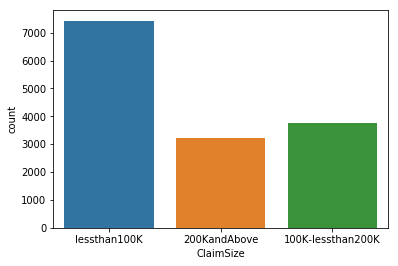

In [50]:
sns.countplot(train_data['ClaimSize'],label="Count")

Drop Column 'PolicyID'

# Plot a histogram

In [51]:
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# ax.scatter(train_data['speed'], train_data['outcome'])
# plt.title("Speed distribution")
# plt.xlabel("Speed")
# plt.ylabel("outcome")
# plt.show()

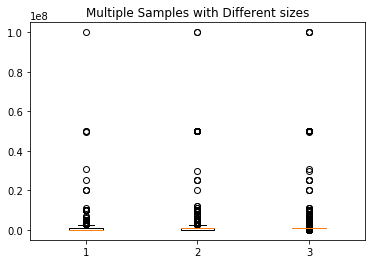

In [52]:
# #box plot
# sns.boxplot(train_final2['PerOccurrence_PolicyLimit'], train_final2['CombinedSingleLimit'], train_final2['PolicyLimitPerInjury'])
# sns.despine()
data = [train_final2['PerOccurrence_PolicyLimit'], train_final2['CombinedSingleLimit'], train_final2['PolicyLimitPerInjury']]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data)
plt.show()

In [53]:
# # groupby
# my_grp = train_data.groupby(['gender'])


In [54]:
# my_grp.describe()

In [55]:
train_final2.dtypes

ClaimSize                                            object
Age_Injured                                           int64
Work_related_injury_status                           object
Amputation                                           object
Death                                                object
Burns_heat                                           object
Burns_chemical                                       object
SystemicPoisoning_toxic                              object
Eye_injury_blindness                                 object
RespiratoryCondition                                 object
NervousCondition                                     object
HearingLoss                                          object
CirculatoryCondition                                 object
MultipleInjuries                                     object
BackInjury                                           object
SkinDisorder                                         object
BrainDamage                             

In [56]:
test_final2.dtypes

Age_Injured                                           int64
Work_related_injury_status                           object
Amputation                                           object
Death                                                object
Burns_heat                                           object
Burns_chemical                                       object
SystemicPoisoning_toxic                              object
Eye_injury_blindness                                 object
RespiratoryCondition                                 object
NervousCondition                                     object
HearingLoss                                          object
CirculatoryCondition                                 object
MultipleInjuries                                     object
BackInjury                                           object
SkinDisorder                                         object
BrainDamage                                          object
Scarring                                

# list all categorical vars 

In [57]:
# convert target to int
train_final2['ClaimSize'] = train_final2['ClaimSize'].replace('lessthan100K', 0)
train_final2['ClaimSize'] = train_final2['ClaimSize'].replace('100K-lessthan200K', 1)
train_final2['ClaimSize'] = train_final2['ClaimSize'].replace('200KandAbove', 2)

In [58]:
train_cat = train_final2.select_dtypes(['object','category'])
test_cat = test_final2.select_dtypes(['object','category'])
train_cat.head()

,Work_related_injury_status,Amputation,Death,Burns_heat,Burns_chemical,SystemicPoisoning_toxic,Eye_injury_blindness,RespiratoryCondition,NervousCondition,HearingLoss,...,Exemplarydamages,WhetherPrimaFacie_JointandSeveralLiability,WorkersCompAvailability,CollateralSourcesAvailability,MedicalInsurance,DisabilityInsurance,SocialSecurityBenefits,Medicare_Medicaid,OtherCollateralSources,Employment_status
0,N,0,0,0,0,0,0,0,0,0,...,No,N,N,N,Y,Y,Y,Y,Y,Y
1,N,0,0,0,0,0,0,0,0,0,...,No,N,N,N,Y,Y,Y,Y,Y,Y
2,N,0,0,0,0,0,0,0,0,0,...,No,N,N,N,Y,Y,Y,Y,Y,Y
3,N,0,A,0,0,0,0,0,0,0,...,No,N,N,N,Y,Y,Y,Y,Y,N
4,N,0,0,0,0,0,0,0,0,0,...,No,N,N,N,Y,Y,Y,Y,Y,N


# list all numeric vars

In [59]:
train_num = train_final2.select_dtypes(['int64', 'float64'])
test_num = test_final2.select_dtypes(['int64', 'float64'])
train_num.head()

,ClaimSize,Age_Injured,Anyothercontributors,AnyMultipleInterestedparties,Match_Multiclaimant_multiInterestedparties_claim,PrimaFacie_percentagefault_injured,PrimaFacie_percentagefault_insured,PrimaFacie_percentagefault_otherinsured,PrimaFacie_percentagefault_uninsured,PolicyType,PolicyForm,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury
0,0,5900,1,0,0.201452,50,50,0,0,1,1,17,0,0,5000000,5000000
1,0,3700,1,0,0.201452,0,100,0,0,2,1,9,0,5000000,0,5000000
2,0,3700,1,0,0.201452,0,100,0,0,2,1,6,0,0,5000000,5000000
3,2,1600,2,1,2.000000,0,50,50,0,4,2,20,0,1000000,3000000,1000000
4,0,5200,1,0,0.201452,0,100,0,0,2,1,6,0,1000000,0,1000000


In [60]:
train_num.shape

(14417, 16)

In [61]:
test_num.shape

(4806, 15)

In [62]:
train_cat.shape

(14417, 44)

In [63]:
test_cat.shape

(4806, 44)

In [64]:
train_cat = train_cat.columns
test_cat = test_cat.columns

In [65]:
# covert all object data type to categorical 
for x in train_cat:
    train_final2[x] = train_final2[x].astype('category')

In [66]:
# covert all object data type to categorical 
for x in test_cat:
    test_final2[x] = test_final2[x].astype('category')

In [67]:
train_final2.dtypes

ClaimSize                                              int64
Age_Injured                                            int64
Work_related_injury_status                          category
Amputation                                          category
Death                                               category
Burns_heat                                          category
Burns_chemical                                      category
SystemicPoisoning_toxic                             category
Eye_injury_blindness                                category
RespiratoryCondition                                category
NervousCondition                                    category
HearingLoss                                         category
CirculatoryCondition                                category
MultipleInjuries                                    category
BackInjury                                          category
SkinDisorder                                        category
BrainDamage             

In [68]:
test_final2.dtypes

Age_Injured                                            int64
Work_related_injury_status                          category
Amputation                                          category
Death                                               category
Burns_heat                                          category
Burns_chemical                                      category
SystemicPoisoning_toxic                             category
Eye_injury_blindness                                category
RespiratoryCondition                                category
NervousCondition                                    category
HearingLoss                                         category
CirculatoryCondition                                category
MultipleInjuries                                    category
BackInjury                                          category
SkinDisorder                                        category
BrainDamage                                         category
Scarring                

In [69]:
# covert all catagorical var to int vars

#train
train_final2[train_cat]= train_final2[train_cat].apply(lambda x: x.cat.codes)

In [70]:
#test
test_final2[test_cat]= test_final2[test_cat].apply(lambda x: x.cat.codes)

In [71]:
train_final2.head()

,ClaimSize,Age_Injured,Work_related_injury_status,Amputation,Death,Burns_heat,Burns_chemical,SystemicPoisoning_toxic,Eye_injury_blindness,RespiratoryCondition,...,PrimaFacie_percentagefault_uninsured,OtherCollateralSources,PolicyType,PolicyForm,Employment_status,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury
0,0,5900,0,0,0,0,0,0,0,0,...,0,0,1,1,1,17,0,0,5000000,5000000
1,0,3700,0,0,0,0,0,0,0,0,...,0,0,2,1,1,9,0,5000000,0,5000000
2,0,3700,0,0,0,0,0,0,0,0,...,0,0,2,1,1,6,0,0,5000000,5000000
3,2,1600,0,0,1,0,0,0,0,0,...,0,0,4,2,0,20,0,1000000,3000000,1000000
4,0,5200,0,0,0,0,0,0,0,0,...,0,0,2,1,0,6,0,1000000,0,1000000


In [72]:
test_final2.head()

,Age_Injured,Work_related_injury_status,Amputation,Death,Burns_heat,Burns_chemical,SystemicPoisoning_toxic,Eye_injury_blindness,RespiratoryCondition,NervousCondition,...,PrimaFacie_percentagefault_uninsured,OtherCollateralSources,PolicyType,PolicyForm,Employment_status,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury
0,4600,1,0,0,1,0,0,0,0,0,...,0,0,1,1,1,6,0,0,2500000,2500000
1,3100,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,26,0,1000000,0,1000000
2,1400,0,0,0,0,0,0,0,0,0,...,0,0,2,1,0,7,0,0,2000000,2000000
3,4400,0,0,0,0,0,0,0,0,0,...,0,0,2,1,1,7,0,0,2000000,2000000
4,4200,0,0,1,0,0,0,0,0,0,...,0,0,2,1,1,7,0,0,100000,100000


In [73]:
train_final2.describe()

,ClaimSize,Age_Injured,Work_related_injury_status,Amputation,Death,Burns_heat,Burns_chemical,SystemicPoisoning_toxic,Eye_injury_blindness,RespiratoryCondition,...,PrimaFacie_percentagefault_uninsured,OtherCollateralSources,PolicyType,PolicyForm,Employment_status,BusinessClass,Perperson_Policylimit,PerOccurrence_PolicyLimit,CombinedSingleLimit,PolicyLimitPerInjury
count,14417.000000,14417.000000,14417.000000,14417.000000,14417.00000,14417.000000,14417.000000,14417.000000,14417.000000,14417.000000,...,14417.000000,14417.0,14417.000000,14417.000000,14417.000000,14417.000000,1.441700e+04,1.441700e+04,1.441700e+04,1.441700e+04
mean,0.708330,4380.814316,0.157384,0.010474,0.11861,0.013664,0.004647,0.003537,0.009017,0.006798,...,0.782618,0.0,2.173476,1.083721,0.649719,13.021294,1.088967e+05,5.543583e+05,1.141678e+06,1.515379e+06
std,0.808465,1645.806843,0.364175,0.101807,0.32334,0.116098,0.068015,0.059374,0.094533,0.082169,...,6.793993,0.0,0.866071,0.276978,0.477074,7.440415,1.229854e+06,1.607942e+06,4.300206e+06,4.497684e+06
min,0.000000,1100.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,1.000000,1.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+04
25%,0.000000,3200.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,2.000000,1.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+06
50%,0.000000,4200.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,2.000000,1.000000,1.000000,8.000000,0.000000e+00,0.000000e+00,1.000000e+06,1.000000e+06
75%,1.000000,5400.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,2.000000,1.000000,1.000000,19.000000,0.000000e+00,1.000000e+06,1.000000e+06,1.000000e+06
max,2.000000,10000.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,100.000000,0.0,5.000000,2.000000,1.000000,26.000000,1.000000e+08,1.000000e+08,1.000001e+08,1.000001e+08


# devide data into train and validation

In [74]:
# Divide in to train and test
y=train_final2["ClaimSize"]
X=train_final2.drop('ClaimSize', axis=1)

#from sklearn.model_selection import train_test_split  
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20)  

In [75]:
print(X_train.shape)
print(X_validation.shape)
print(y_train.shape)
print(y_validation.shape)

(11533, 59)
(2884, 59)
(11533,)
(2884,)


In [76]:
print(y_train.value_counts())
y_validation.value_counts()

0    5959
1    3041
2    2533
Name: ClaimSize, dtype: int64


0    1468
1     727
2     689
Name: ClaimSize, dtype: int64

# Build Logistic Regression

In [77]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_validation)

In [78]:
print("Accuracy: %s%%" % (100*accuracy_score(y_validation, y_pred)))
print(confusion_matrix(y_validation, y_pred))
print(classification_report(y_validation, y_pred))

Accuracy: 50.970873786407765%
[[1465    0    3]
 [ 727    0    0]
 [ 684    0    5]]
             precision    recall  f1-score   support

          0       0.51      1.00      0.67      1468
          1       0.00      0.00      0.00       727
          2       0.62      0.01      0.01       689

avg / total       0.41      0.51      0.35      2884



C:\Users\panch\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



# Build LR, KNN, Naive Bayes, Random Forest Model and compare

In [79]:


seed = 7
num_folds = 10

# Params for Random Forest
num_trees = 100
max_features = 3

#Spot Check 5 Algorithms (LR, KNN, GNB, SVM)

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
#models.append(('SVM', svm.SVC()))

# evalutate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.517215 (0.017941)
KNN: 0.484089 (0.009258)
NB: 0.319437 (0.070417)
RF: 0.675628 (0.018388)


As RandomForest model accuracy is more comparitive to other models, we can finalize the model RF

In [80]:
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(y_validation, predictions)))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

Accuracy: 69.38280166435507%
[[1236   90  142]
 [ 228  422   77]
 [ 271   75  343]]
             precision    recall  f1-score   support

          0       0.71      0.84      0.77      1468
          1       0.72      0.58      0.64       727
          2       0.61      0.50      0.55       689

avg / total       0.69      0.69      0.69      2884



# predication on  test data

In [81]:
test_data.head()

,ClaimID
0,CLM51003
1,CLM51006
2,CLM51016
3,CLM51017
4,CLM51020


In [82]:
# predication on  test data 
predictions = random_forest.predict(test_final2)
print(len(predictions))
predictions


4806


array([2, 0, 0, ..., 1, 0, 0], dtype=int64)

In [83]:
final_pred = pd.DataFrame(predictions)
type(final_pred)
final_pred.columns= ['ClaimSize']
final_pred['ClaimSize'] = final_pred['ClaimSize'].replace(0,'lessthan100K')
final_pred['ClaimSize'] = final_pred['ClaimSize'].replace(1,'100K-lessthan200K')
final_pred['ClaimSize'] = final_pred['ClaimSize'].replace(2,'200KandAbove')

In [84]:
final_pred.head()

,ClaimSize
0,200KandAbove
1,lessthan100K
2,lessthan100K
3,200KandAbove
4,lessthan100K


In [85]:
prediction = pd.DataFrame(final_pred['ClaimSize'], columns=['ClaimSize']).to_csv('sample_submission-1542197608821_1.csv')

In [86]:
## XG boost

In [1]:
# monitor training performance
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

model = XGBClassifier()
eval_set = [(X_validation, y_validation)]
model.fit(X_train, y_train, eval_metric="map", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_validation)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_validation, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

NameError: name 'X_validation' is not defined

In [88]:
##predication on  test data 
predictions = model.predict(test_final2)
print(len(predictions))
predictions

final_pred = pd.DataFrame(predictions)
type(final_pred)
final_pred.columns= ['ClaimSize']
final_pred['ClaimSize'] = final_pred['ClaimSize'].replace(0,'lessthan100K')
final_pred['ClaimSize'] = final_pred['ClaimSize'].replace(1,'100K-lessthan200K')
final_pred['ClaimSize'] = final_pred['ClaimSize'].replace(2,'200KandAbove')

prediction = pd.DataFrame(final_pred['ClaimSize'], columns=['ClaimSize']).to_csv('sample_submission-1542197608821_3.csv')

4806


C:\Users\panch\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



In [89]:
importances = model.feature_importances_

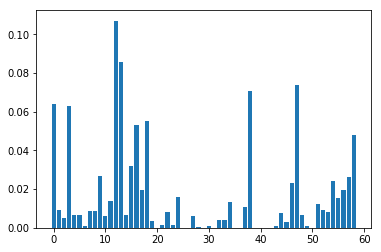

In [90]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

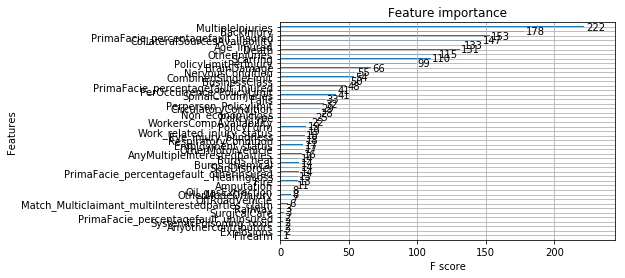

In [91]:
import xgboost as xgb
xgb.plot_importance(model)

In [92]:
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d : %s : (%f)" % (f + 1, indices[f], X.iloc[:,indices[f]].name, importances[indices[f]]))

1. feature 12 : MultipleInjuries : (0.107091)
2. feature 13 : BackInjury : (0.085866)
3. feature 47 : PrimaFacie_percentagefault_insured : (0.073806)
4. feature 38 : CollateralSourcesAvailability : (0.070912)
5. feature 0 : Age_Injured : (0.064158)
6. feature 3 : Death : (0.063193)
7. feature 18 : OtherInjuries : (0.055475)
8. feature 16 : Scarring : (0.053063)
9. feature 58 : PolicyLimitPerInjury : (0.047757)
10. feature 15 : BrainDamage : (0.031838)
11. feature 9 : NervousCondition : (0.026532)
12. feature 57 : CombinedSingleLimit : (0.026049)
13. feature 54 : BusinessClass : (0.024120)
14. feature 46 : PrimaFacie_percentagefault_injured : (0.023155)
15. feature 56 : PerOccurrence_PolicyLimit : (0.019778)
16. feature 17 : SpinalCordInjuries : (0.019778)
17. feature 24 : Falls : (0.015919)
18. feature 55 : Perperson_Policylimit : (0.015437)
19. feature 11 : CirculatoryCondition : (0.013989)
20. feature 34 : Non_economicloss : (0.013507)
21. feature 51 : PolicyType : (0.012060)
22. fea

In [93]:
from sklearn.model_selection import GridSearchCV
#Cs = [0.001, 0.01, 0.1, 1, 10]
#gammas = [0.001, 0.01, 0.1, 1]
#param_grid = {'C': Cs, 'gamma' : gammas}
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 7],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X=X_train, y=y_train)
rf_model = grid_search.best_estimator_
print (grid_search.best_score_, grid_search.best_params_) 

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 19.2min finished


0.7136044394346658 {'bootstrap': True, 'max_depth': 80, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 100}


In [94]:
# predication on  test data 
predictions = rf_model.predict(test_final2)
print(len(predictions))
predictions

4806


array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [95]:
final_pred = pd.DataFrame(predictions)
type(final_pred)
final_pred.columns= ['ClaimSize']
final_pred['ClaimSize'] = final_pred['ClaimSize'].replace(0,'lessthan100K')
final_pred['ClaimSize'] = final_pred['ClaimSize'].replace(1,'100K-lessthan200K')
final_pred['ClaimSize'] = final_pred['ClaimSize'].replace(2,'200KandAbove')

In [97]:
prediction = pd.DataFrame(final_pred['ClaimSize'], columns=['ClaimSize']).to_csv('sample_submission-1542197608821_2.csv')